## Sunspot Lab: Sammy Muench, AST 51, 2/1/2023

**Goal**: The goal of this study was to measure the sun’s rotation over a multi-day period. This was accomplished using DS9 to analyze images of the sun using sunspots. Jupyter Notebook was used to calculate the sun’s measured rotation period.

**Procedures**: First, pictures of the sun were downloaded from NASA’s website. The wavelength used for the pictures was the HMI Intensitygram (gray). The images were taken at the following times in 2014: (11-29, 01:39:10), (11-30, 00:57:10), (12-01, 00:39:10), and (12-02, 00:39:10), to get pictures at almost all evenly spaced times. These pictures are shown below in the same order as listed above. The pictures below were taken with the HMI Intensitygram because this wavelength clearly isolates the sunspots in its pictures. This is because sunspots are cooler than other parts of the sun, so sunspots appear black and are easy to track with the HMI Intensitygram. The pictures were extracted from a .tar file, and each was uploaded to DS9. The sunspots were marked with a region and their x and y coordinates were measured as well as the length of each spot’s latitude line. From these data from all four pictures, the average velocity of the sun’s rotation was calculated, which was used to determine the period.  

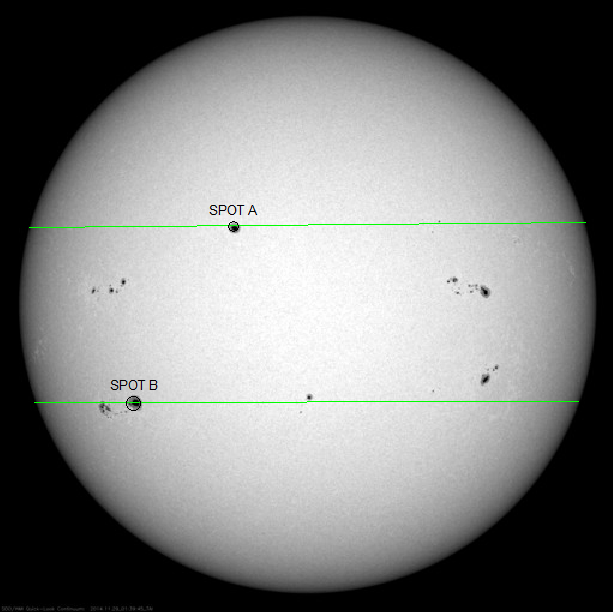

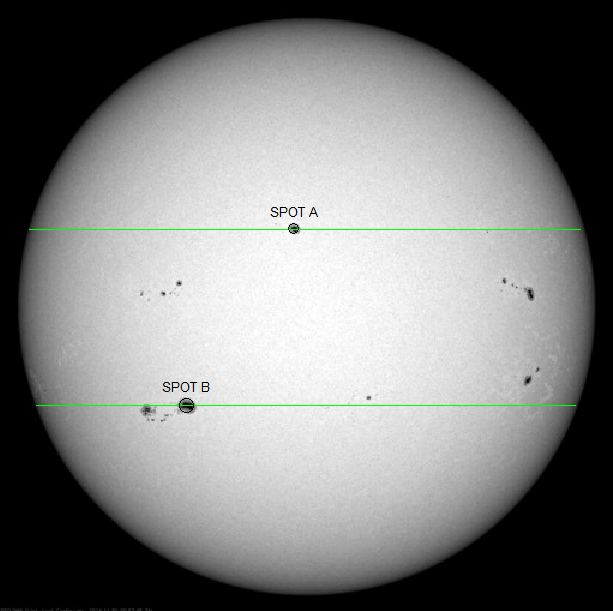

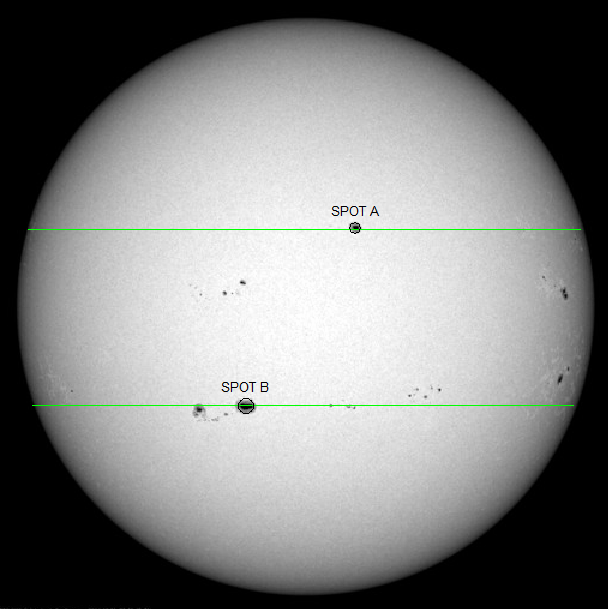

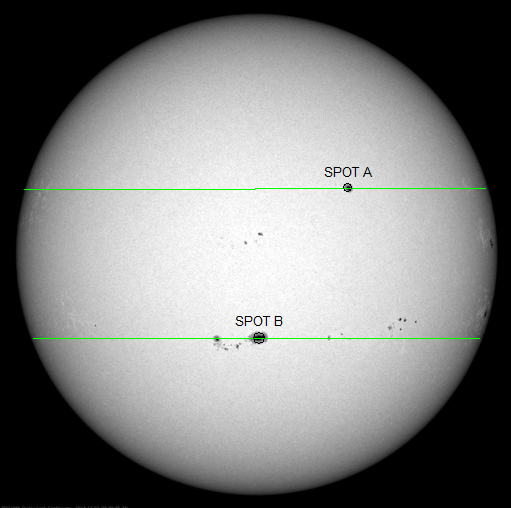

**Results**: Calculations in python are listed below, followed by the tables of values.

In [59]:
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime

#Import necessary packages

In [32]:
#data for spot A

spotA_xcoords = np.array([196, 247, 299, 349])
spotA_y = int((sum([320, 321, 322, 324]) / 4)) #calculate average y coordinate of sunspot A
spotA_L = int((sum([462, 460, 461, 461]) / 4)) #calculate average latitude


#data for spot B
spotB_xcoords = np.array([113, 158, 207, 259])
spotB_y = int((sum([175, 175, 174, 174]) / 4)) #calculate average y coordinate of sunspot A
spotB_L = int((sum([452, 450, 451, 450]) / 4)) #average latitude for part B


In [14]:
#create array of times

date1 = datetime(2014, 11, 29, 1, 39, 10)
date2 = datetime(2014, 11, 30, 0, 57, 10)
date3 = datetime(2014, 12, 1, 0, 39, 10)
date4 = datetime(2014, 12, 2, 0, 39, 10)

times = np.array([date1, date2, date3, date4])

Below are two tables, one for spot A and one for spot B, that list their initial measured values before calculations (t, x, y, L)

# Spot A:

Picture # |Time in 2014 (m-d, hr:min:sec) |x(coord) |y(coord) |L(coord length)|S(coord length)
-----|-----|-----|-----|-----|-----
1|11-29, 01:39:10|196|320|462|1451
2|11-30, 00:57:10|247|321|460|1445
3|12-01, 00:39:10|299|322|461|1448
4|12-02, 00:39:10|349|324|461|1448


# Spot B:

Picture # |Time in 2014 (m-d, hr:min:sec) |x(coord) |y(coord) |L(coord length)|S(coord length)
-----|-----|-----|-----|-----|-----
1|11-29, 01:39:10|113|175|452|1419
2|11-30, 00:57:10|158|175|450|1413
3|12-01, 00:39:10|207|174|451|1416
4|12-02, 00:39:10|259|174|450|1413

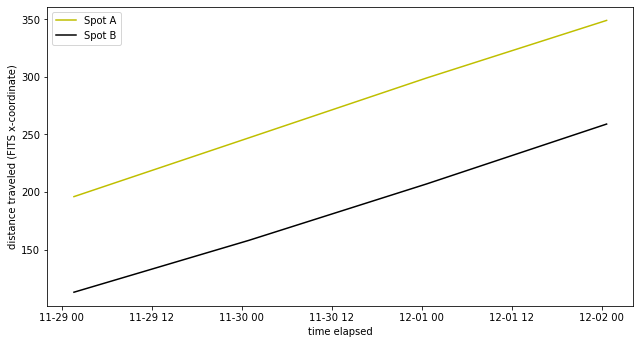

In [71]:
#x vs t plot

fig, ax = plt.subplots(figsize = (4, 4))
ax.plot(times, spotA_xcoords, color = 'y', label = 'Spot A')
ax.plot(times, spotB_xcoords, color = 'k', label = 'Spot B')
ax.set_xlabel('time elapsed')
ax.set_ylabel('distance traveled (FITS x-coordinate)') #label axes
fig = plt.gcf()
fig.set_size_inches(10.5, 5.5)

ax.legend() #labels for lines
plt.show; #remove uneccesary text

In [54]:
#conversion from coordinates in the FITS pictures to actual sun distance

coords = 480
sun_diameter = 1392000
km_per_coord = sun_diameter / coords

In [55]:
#Define a function that takes two x-coordinates and two Times, and returns the velocity of the sunspot in km/sec.

def calculate_velocity(x1, x2, t1, t2):
    timeDiff = (t2 - t1).total_seconds()
    xDiff = (x2 - x1) * km_per_coord
    return xDiff / timeDiff

#Define a function that takes x-velocity, the length of a spot's latitude, and a boolean on whether we are calculating
#period in terms of seconds or days. Returns the period of the sun's rotation from this data.

def period(vel, latLen):
    len_km = latLen * km_per_coord
    return ((math.pi * len_km) / vel)
    

In [56]:
#Calculate velocities of spot A and spot B (in km/sec) between each pair of consecutive pictures

velo_spotA = []

for i in range(len(spotA_xcoords) - 1):
    velo_spotA.append(calculate_velocity(spotA_xcoords[i], spotA_xcoords[i + 1], times[i], times[i + 1]))

velo_spotA = np.array(velo_spotA)
print("velocities for spot A (km/sec):" + str(velo_spotA)) #Period in days for spot A

velo_spotB = []

for i in range(len(spotB_xcoords) - 1):
    velo_spotB.append(calculate_velocity(spotB_xcoords[i], spotB_xcoords[i + 1], times[i], times[i + 1]))
    
velo_spotB = np.array(velo_spotB)
print("velocities for spot B (km/sec):" + str(velo_spotB)) #Period in days for spot A

velocities for spot A (km/sec):[1.76323319 1.76746367 1.67824074]
velocities for spot B (km/sec):[1.55579399 1.66549461 1.74537037]


In [57]:
Period_A = period(velo_spotA, spotA_L)
Period_B = period(velo_spotB, spotB_L) 
#calculate period of spots A and B (in seconds)

print("P [hr] spot A:" + str(Period_A / 60)) #Period in hrs for spot A
print("P [hr] spot B:" + str(Period_B/ 60)) #Period in hrs for spot B

periodA_day = Period_A / 86400
periodB_day = Period_B / 86400

print("P [day] spot A:" + str(periodA_day)) #Period in days for spot A
print("P [day] spot B:" + str(periodB_day)) #Period in days for spot B

P [hr] spot A:[39699.75196471 39604.72944845 41710.29734318]
P [hr] spot B:[43919.46529719 41026.63549045 39149.0776832 ]
P [day] spot A:[27.5692722  27.50328434 28.96548427]
P [day] spot B:[30.49962868 28.49071909 27.1868595 ]


For each sunspot, three measurements of velocity and period were taken: picture2 - picture1, picture3 - picture2, and picture4 - picture3. The velocities and periods calculated in these measurements are listed in the tables below for each sunspot: 

# Spot A:

Pictures used|$v_x$ (km/sec) |P [hr]|P [day]|
-----|-----|-----|-----
1 and 2|1.76|39700|27.6
2 and 3|1.77|39600|27.5
3 and 4|1.67|41700|29.0

# Spot B:

Pictures used|$v_x$ (km/sec)|P [hr]|P [day]|
-----|-----|-----|-----
1 and 2|1.56|43900|30.5
2 and 3|1.67|41000|28.5
3 and 4|1.75|39000|27.2

**Discussion**: Sunspots A and B gave slightly different answers on an individual basis, but both periods hovered around 28 days, close to the sun's real rotation period of 27 days. The sunspots likely did not give consistent answers because of the following possible errors: the center of the region in DS9 may have been off, rounding for x and y-values were to the nearest whole coordinate, and the measurements did not account for the curvature of the sun. This phenomenon is explained further below:

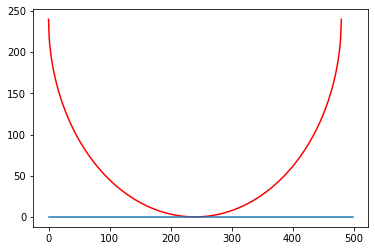

In [58]:
x = np.linspace(0, 480, 480)
y = -(240 ** 2 - ((x - 240) ** 2)) ** 0.5 + 240 #add 240 to keep function above the x-axis
plt.plot(x, y, 'r')
z = np.zeros(500)
plt.plot(z)
plt.show;

Since the sun is approximately a sphere whose diameter spans 480 DS9 coordinates (as measured in the FITS pictures), its radius = 240 FITS coordinates
$x^2 + y^2 = r^2 = 240^2$  
$y = \sqrt{240^2 - x^2}$ hence the y equation above. 240 is subtracted from x and added to the whole equation to normalize the graph around x = 240.

As a sunspots travels along the pictures, it seemingly travels from left to right --> along the blue line above. However, the sunspot is actually traveling along the red line because of the sun's curvature, since the sun is approximately a sphere. Thus, when calculating velocity and period, this should be accounted for. The methodology used for this involves calculating the arc length of the function representated by the red line (which represents the sun's curvature) as a sunspot moves from left to right. The formula for arc length is listed below: 

# $ \int_{x_1}^{x_2} \sqrt{1 + f'(x)^2} \,dx $

This equation may be used to account for the sun's curvature.

Sunspot B in particular seemingly got faster as more pictures were taken; this was the only apparent trend in the data. This phenomenon, plus the last measurement for part A being higher than the others, are likely attributable to the errors listed above. Each latitude should have the same rotation period, but since the sun is made of gas, this may not be the case. Though different individual answers were obtained for the two different latitudes, their aggregated data points were clustered together between 27-30 day periods.

**Conclusions**: The goal was acheived in measuring the sun's rotation close to 27 days for the two sunspots. Pictures were obtained from NASA, analyzed in DS9, and periods were calculated for each measurement. The data were clustered close together around 27-30 days. Errors could have occured in rounding of decimal places, visual measurement errors, and not accounting for the curvature of the sun. Future research should incorporate the sun's shape into its measurements by calculating distance traveled, using the arc length formula for circles as listed in the discussion. 